In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

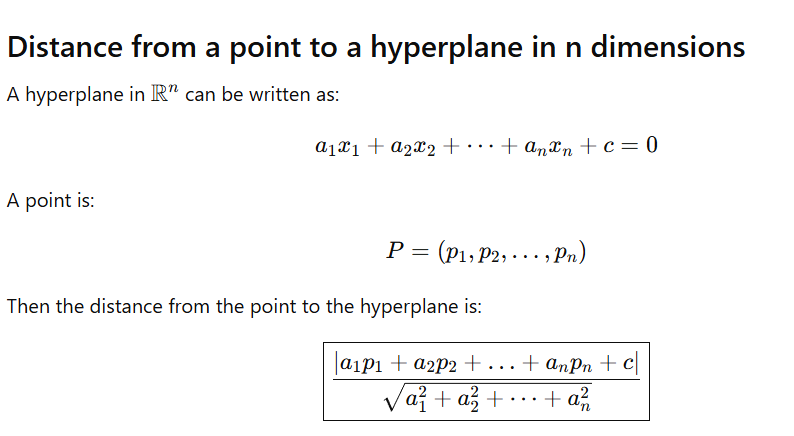

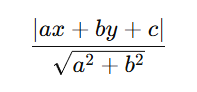

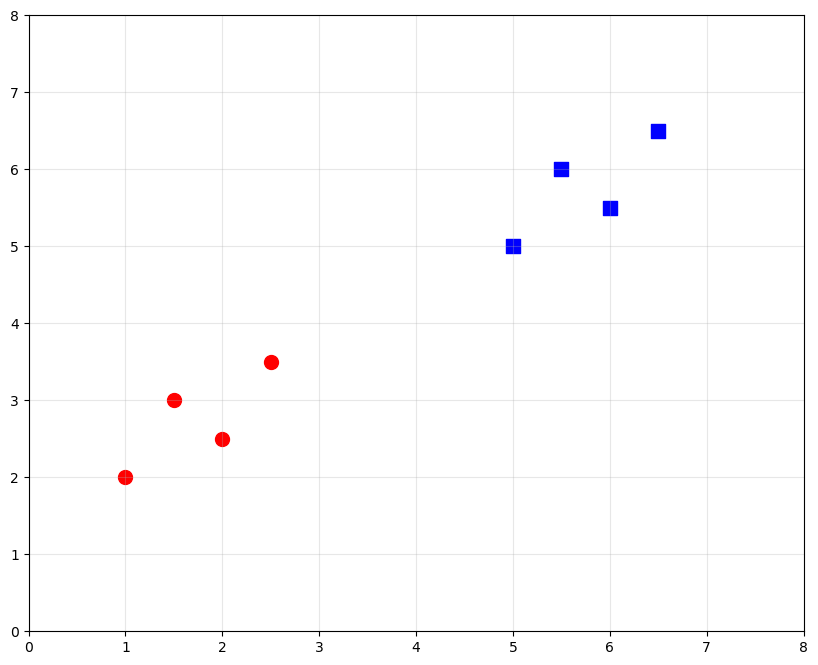

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create sample data: two groups of (x, y) points
group_a = np.array([[1, 2], [1.5, 3], [2, 2.5], [2.5, 3.5]])
group_b = np.array([[5, 5], [5.5, 6], [6, 5.5], [6.5, 6.5]])

# Combine into training data
points = np.vstack([group_a, group_b])
labels = np.array([0, 0, 0, 0, 1, 1, 1, 1])  # 0 for group A, 1 for group B

# Visualize the result
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the two groups
ax.scatter(group_a[:, 0], group_a[:, 1], color='red', s=100, label='Group A', marker='o')
ax.scatter(group_b[:, 0], group_b[:, 1], color='blue', s=100, label='Group B', marker='s')

ax.grid(True, alpha=0.3)
ax.set_xlim(0, 8)
ax.set_ylim(0, 8)
plt.show()


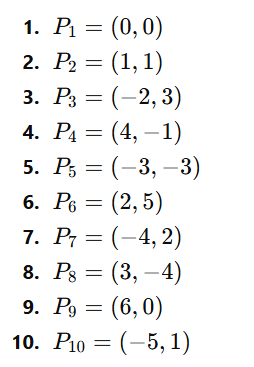

point 0 is above the surface with the distance of 1.0
point 1 is above the surface with the distance of 2.4
point 2 is above the surface with the distance of 2.2
point 3 is above the surface with the distance of 2.6
point 4 is --BELOW-- the surface with the distance of -3.2
point 5 is above the surface with the distance of 6.2
point 6 is above the surface with the distance of 0.2
point 7 is --BELOW-- the surface with the distance of -0.4
point 8 is above the surface with the distance of 4.6
point 9 is --BELOW-- the surface with the distance of -1.2


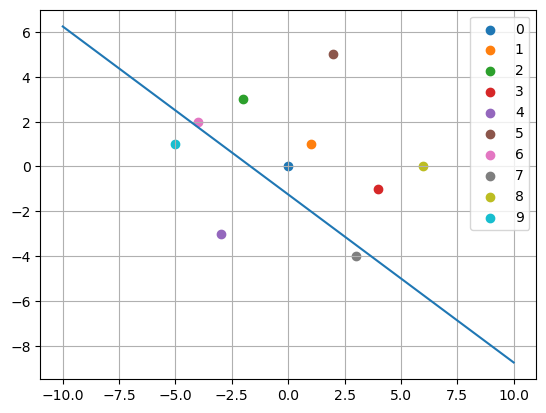

In [14]:
# 3x + 4y + 5 = 0
# 1 draw the line
# 2 find the distance using the formula above
# 3 detect for each point if its above the surface or below ...

points = np.array([
    [0, 0],
    [1, 1],
    [-2, 3],
    [4, -1],
    [-3, -3],
    [2, 5],
    [-4, 2],
    [3, -4],
    [6, 0],
    [-5, 1]
])

# 3x + 4y + 5 = 0

# 1 draw the line
x = np.linspace(-10,10,500)
y = -0.75 * x - 1.25
plt.plot(x,y)

# 2 find the distance using the formula above
def plot_vector(p):
    # 3x + 4y + 5 = 0
    a1 = 3
    a2 = 4
    c = 5
    for i, point in enumerate(points):
        # ax + by + c / sqrt(a**2 + b**2)
        x = point[0]
        y = point[1]
        numerator = a1 * x + a2 * y + c
        denominator = np.sqrt(a1**2 + a2**2)
        vec_dist = numerator / denominator

        # decide if above or below
        if vec_dist > 0:
            print(f'point {i} is above the surface with the distance of {vec_dist}')
        else :
            print(f'point {i} is --BELOW-- the surface with the distance of {vec_dist}')
        
        plt.scatter(x, y,label=i)
        
    plt.grid()
    plt.legend()


plot_vector(points)
        
# 3 detect for each point if its above the surface or below ...

Searching for best separating line...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


3.787878787878787
-10.0
1.005548803070833


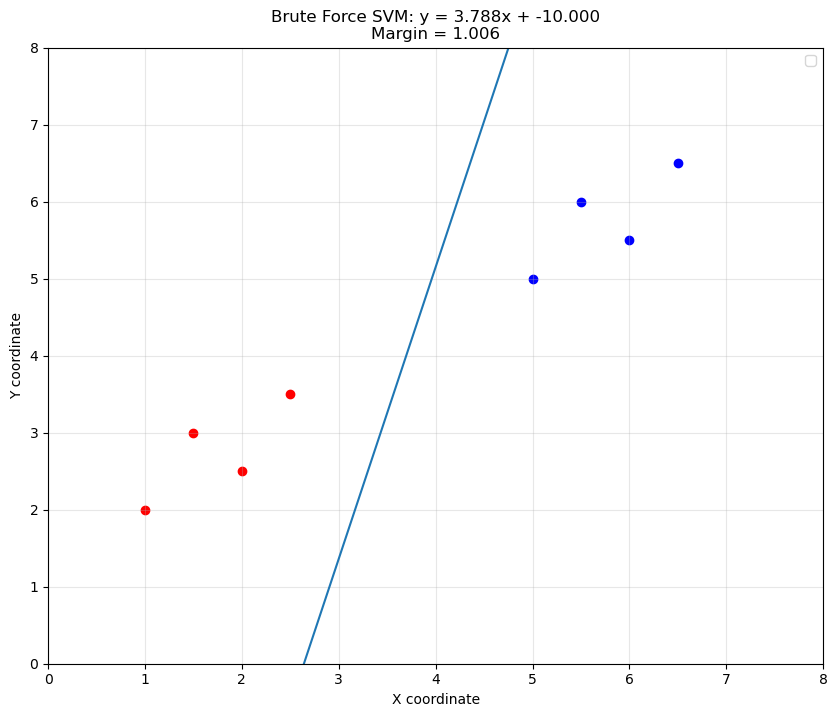

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Create sample data: two groups of (x, y) points
group_a = np.array([[1, 2], [1.5, 3], [2, 2.5], [2.5, 3.5]])
group_b = np.array([[5, 5], [5.5, 6], [6, 5.5], [6.5, 6.5]])

# Combine into training data
points = np.vstack([group_a, group_b])
labels = np.array([0, 0, 0, 0, 1, 1, 1, 1])  # 0 for group A, 1 for group B

# find the best svm plane

def get_signed_distance(point, a1, a2, c):
        x = point[0]
        y = point[1]
        numerator = a1 * x + a2 * y + c
        denominator = np.sqrt(a1**2 + a2**2)
        vec_dist = numerator / denominator
        return vec_dist

def get_abs_distance(point, a1, a2, c):
    return abs(distance(point, a1, a2, c))

slopes = np.linspace(-5, 5, 100)
intercepts = np.linspace(-10, 20, 100)

print("Searching for best separating line...")

largest_distance_from_min = -1  # the largest distance from the closest point
best_slope = None
best_intercept = None
for slope in slopes:
    for intercept in intercepts:
        # a1*X + a2*Y + c = 0
        
        # y = aX + b
        # 0 = aX + b -1*y 
        # 0 = aX -1*y + b
        # 0 = aX -1*y + c
        # a1 = slope
        # a2 = -1
        # c = intercept
        
        # step 1 check if all points are in he correct side
        # signed_distance
        # if label == 0 --> get_signed_distance (negative)
        # if label == 1 --> get_signed_distance (positive)
        # if 1 point does not match --> continue
        # save the line

        valid = True
        distances = []
        for point in group_a:
            dist = get_signed_distance(point, slope, -1, intercept)
            # should be negative, if positive -- the line is invalid
            if dist >= 0:
                valid = False
            else:
                distances.append(abs(dist))

        for point in group_b:
            dist = get_signed_distance(point, slope, -1, intercept)
            # should be positive, if negative -- the line is invalid
            if dist <= 0:
                valid = False
            else:
                distances.append(abs(dist))

        if not valid:
            continue

        # step 2 - find the closest point to this surface
        # place all disatnces in a list and choose the minimum
        closest_point_distance = min(distances)  # closest point to the surface
        if closest_point_distance > largest_distance_from_min:
            largest_distance_from_min = closest_point_distance
            best_slope = slope
            best_intercept = intercept

print(best_slope)
print(best_intercept)
print(largest_distance_from_min)

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')
ax.legend()
ax.set_title(f'Brute Force SVM: y = {best_slope:.3f}x + {best_intercept:.3f}\nMargin = {largest_distance_from_min:.3f}')
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 8)
ax.set_ylim(0, 8)

line_x = np.linspace(0, 10, 10)
line_y = best_slope * line_x + best_intercept
ax.plot(line_x, line_y)


ax.scatter(group_a[: , 0], group_a[: , 1], color='red')
ax.scatter(group_b[: , 0], group_b[: , 1], color='blue')

plt.show()
